# Question 1

# Perform PCA over all the images in the dataset.

# Importing Librarys

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
import glob
from IPython.display import Image, display

# Code for reconstruction of Images after applying PCA

In [2]:
def reconstruct_images(x_pca):
    count = 1
    base_dir = "result/"
    for i in x_pca:
        reshaped_i = i.reshape((64,64))
        unint_reshaped_i = reshaped_i.astype(np.uint8)
        i = Image.fromarray(unint_reshaped_i,'L')
        i.rotate(180)
        path = base_dir+str(count)+".jpg"
        i.save(path,"JPEG")
        count = count+1
    return

# Loading data

In [3]:
path = 'G:\second_sem\SMAI\Assignment_3\q1\A3\dataset'
images = []
count = 0
classes = []
for f in os.listdir(path):
    label = f[1:f.find("_")]
    images.append(np.asarray(Image.open(path +'/'+f).convert('L').resize((64, 64))).flatten())
    classes.append(int(label))

In [4]:
xtrain = np.array(images)

# Calculating the mean matrix from the original matrix and subtracting the mean matrix from the original matrix and forming the covariance matrix from the resultant matrix. After that corresponding eigen values and eigen vectors are calculated.

In [5]:
x_mean = np.mean(xtrain, axis =0)
x_center = xtrain - x_mean
x_cov = np.cov(x_center.T)
x_eigenvalues, x_eigenvectors = np.linalg.eig(x_cov)

# Sorting the eigen values and their corrsponding eigen vector in decreasing order.

In [6]:
indexes = x_eigenvalues.argsort()[::-1]   
eigenvalues = x_eigenvalues[indexes]
eigenvectors = x_eigenvectors[:,indexes]

# Plotting the graph between varaince error and the number of components And selecting the number of principal component where the error < 20%.

C:\Users\Indranil\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


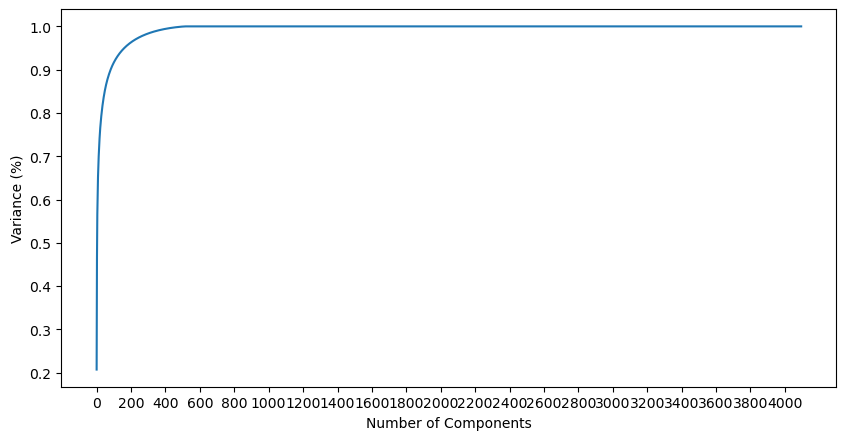

In [8]:
var = []
k = 0
n_comp = 0
flag = 0
for i in eigenvalues:
    error = (np.abs(i)/np.sum(eigenvalues))
    k = k+1
    ratio = np.sum(eigenvalues[:k])/np.sum(eigenvalues[:])    
    if(ratio > 0.89 and flag == 0):
        n_comp = k
        flag = 1
    var.append(error)
plt.figure()
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 100
plt.plot(np.cumsum(var))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.xticks(np.arange(0, 4096+1, 200.0))
plt.show()

# The number of Principal component is 74 which is calculated in previous block.

In [9]:
n_comp

74

In [10]:
n_components = n_comp

# Reconstruction of dataset using the principal components which is 74 by the dot product of the transpose of the selected eigen vectors and and the transpos of the original dataset

In [11]:
red_eigenvec = eigenvectors[:,:n_components]
x_pca = red_eigenvec.T.dot(xtrain.T)

# Reconstructing the images using the principal components

In [12]:
new_eigvec = eigenvectors[:,:n_components]
z=new_eigvec.T.dot(xtrain.T)
re_xtrain =new_eigvec.dot(z)
reconstruct_images(re_xtrain.T)

C:\Users\Indranil\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


# The reconstructed images using the pcincipal components

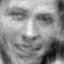

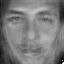

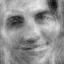

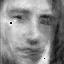

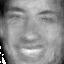

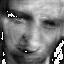

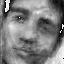

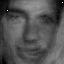

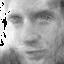

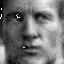

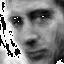

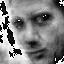

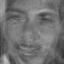

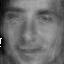

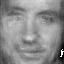

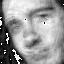

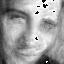

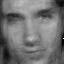

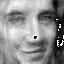

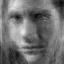

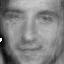

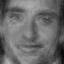

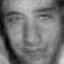

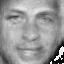

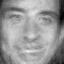

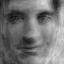

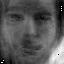

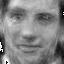

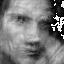

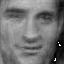

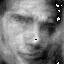

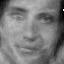

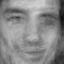

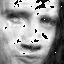

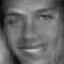

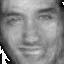

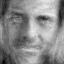

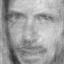

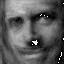

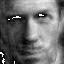

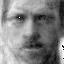

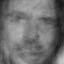

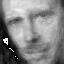

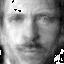

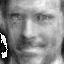

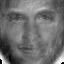

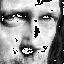

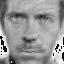

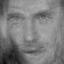

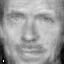

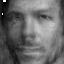

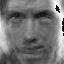

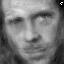

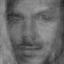

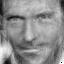

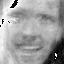

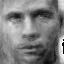

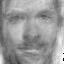

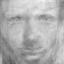

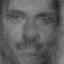

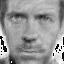

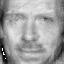

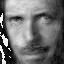

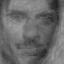

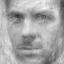

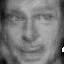

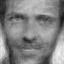

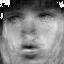

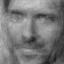

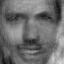

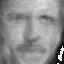

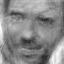

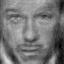

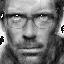

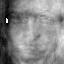

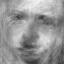

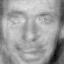

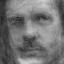

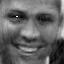

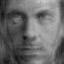

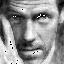

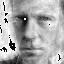

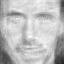

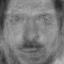

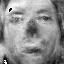

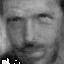

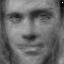

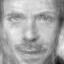

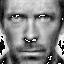

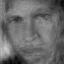

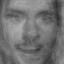

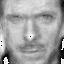

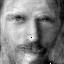

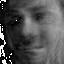

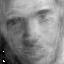

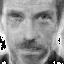

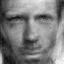

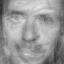

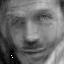

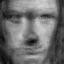

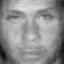

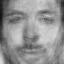

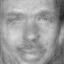

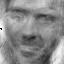

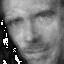

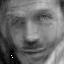

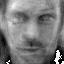

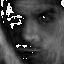

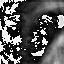

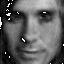

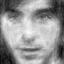

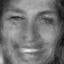

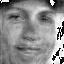

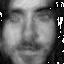

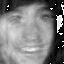

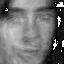

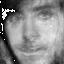

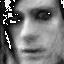

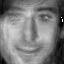

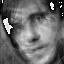

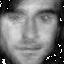

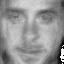

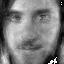

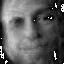

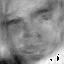

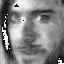

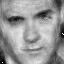

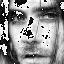

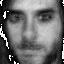

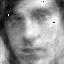

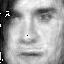

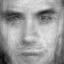

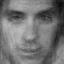

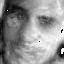

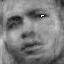

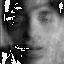

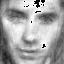

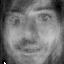

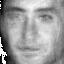

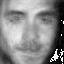

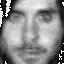

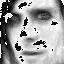

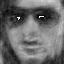

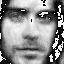

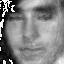

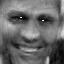

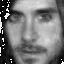

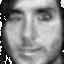

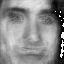

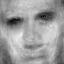

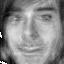

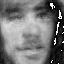

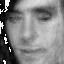

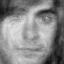

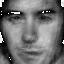

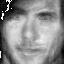

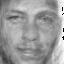

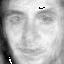

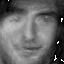

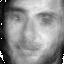

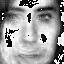

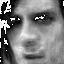

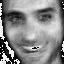

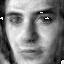

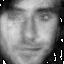

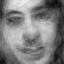

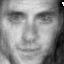

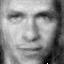

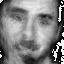

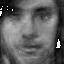

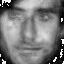

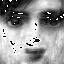

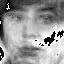

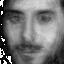

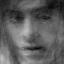

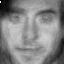

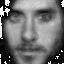

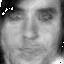

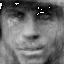

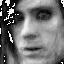

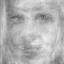

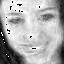

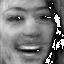

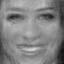

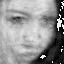

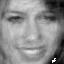

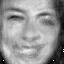

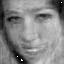

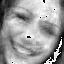

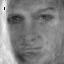

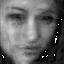

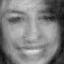

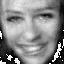

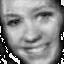

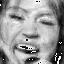

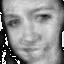

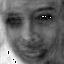

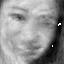

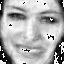

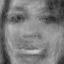

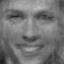

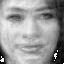

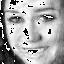

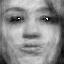

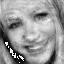

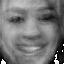

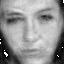

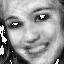

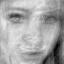

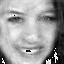

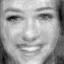

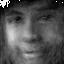

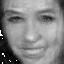

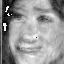

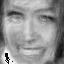

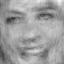

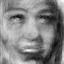

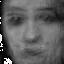

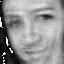

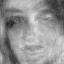

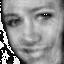

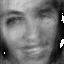

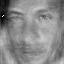

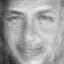

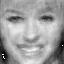

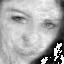

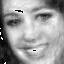

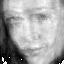

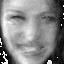

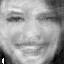

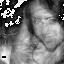

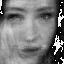

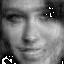

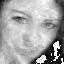

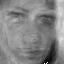

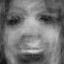

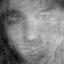

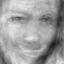

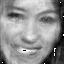

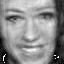

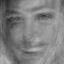

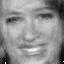

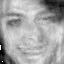

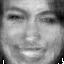

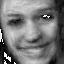

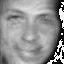

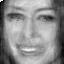

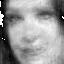

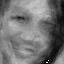

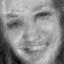

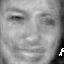

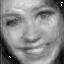

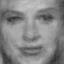

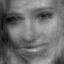

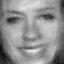

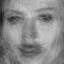

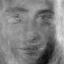

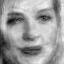

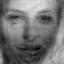

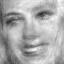

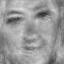

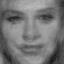

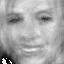

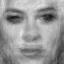

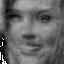

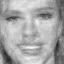

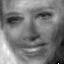

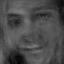

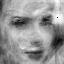

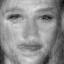

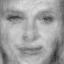

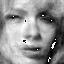

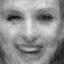

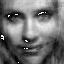

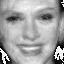

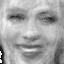

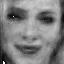

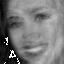

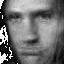

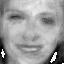

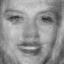

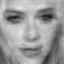

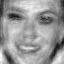

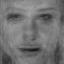

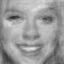

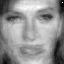

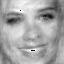

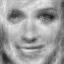

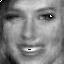

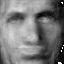

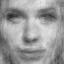

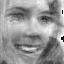

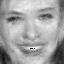

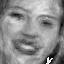

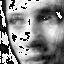

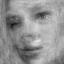

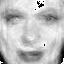

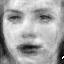

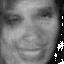

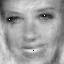

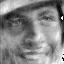

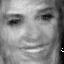

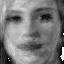

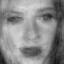

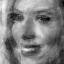

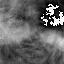

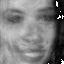

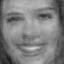

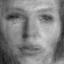

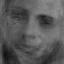

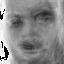

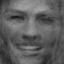

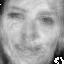

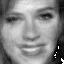

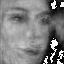

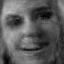

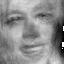

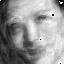

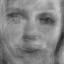

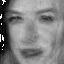

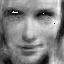

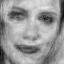

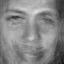

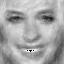

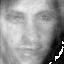

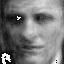

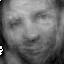

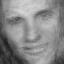

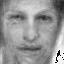

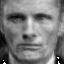

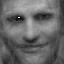

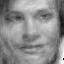

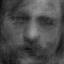

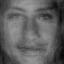

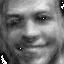

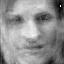

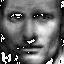

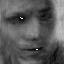

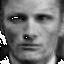

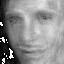

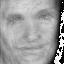

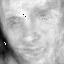

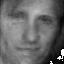

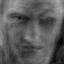

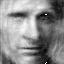

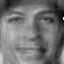

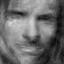

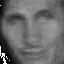

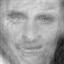

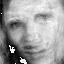

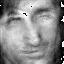

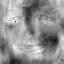

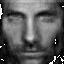

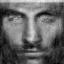

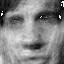

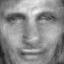

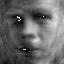

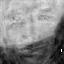

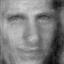

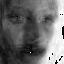

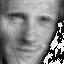

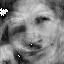

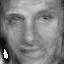

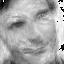

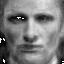

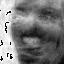

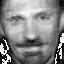

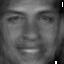

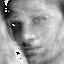

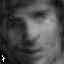

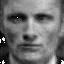

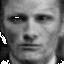

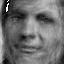

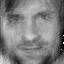

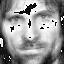

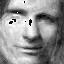

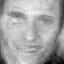

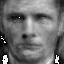

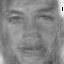

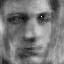

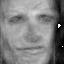

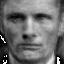

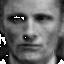

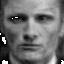

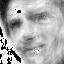

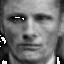

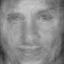

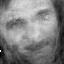

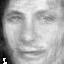

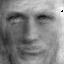

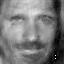

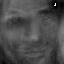

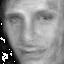

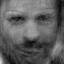

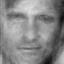

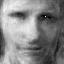

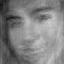

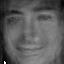

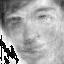

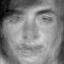

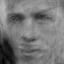

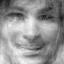

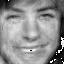

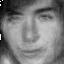

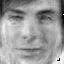

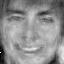

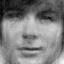

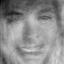

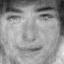

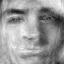

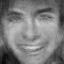

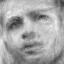

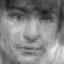

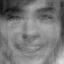

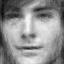

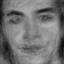

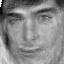

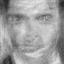

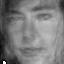

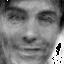

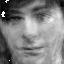

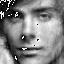

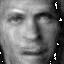

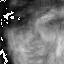

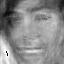

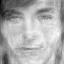

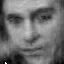

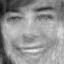

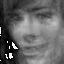

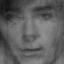

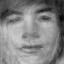

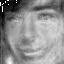

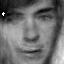

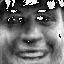

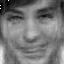

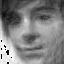

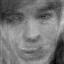

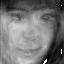

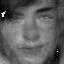

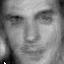

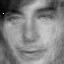

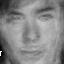

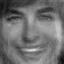

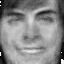

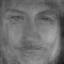

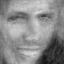

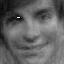

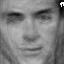

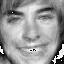

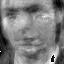

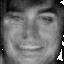

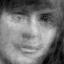

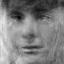

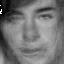

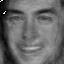

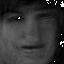

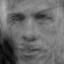

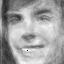

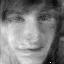

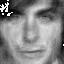

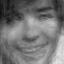

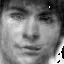

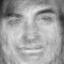

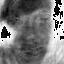

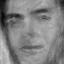

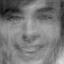

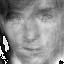

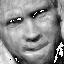

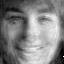

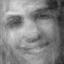

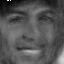

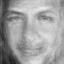

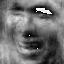

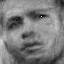

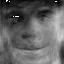

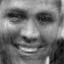

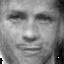

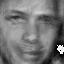

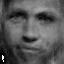

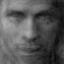

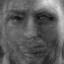

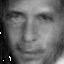

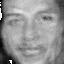

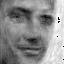

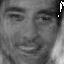

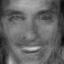

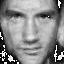

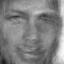

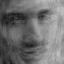

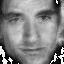

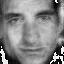

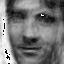

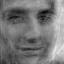

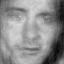

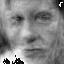

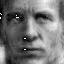

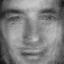

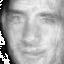

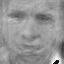

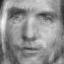

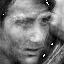

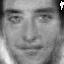

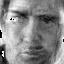

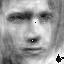

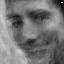

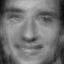

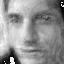

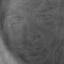

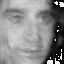

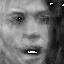

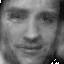

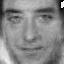

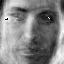

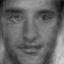

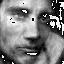

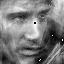

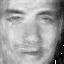

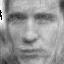

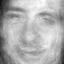

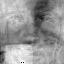

In [20]:
for imageName in glob.glob('./result/*.JPG'): #assuming JPG
    display(Image(filename=imageName))

# Plotting a graph showing the total mean square error over all train images vs the number of principal components used to reconstruct.

Text(0, 0.5, 'MSE')

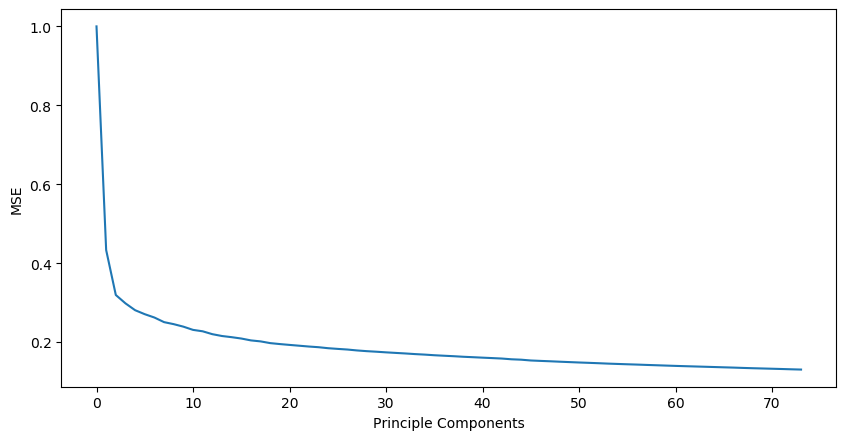

In [119]:
mse=[]
comp=[]
for i in range(n_components):
    new_eigvec=eigenvectors[:,0:i]
    z=new_eigvec.T.dot(xtrain.T)
    xsvdtrain=new_eigvec.dot(z)
    error=0
    for j,k in enumerate(xtrain):
        norm_diff = np.linalg.norm(xtrain[j] - xsvdtrain.T[j])
        avg_norm_diff = norm_diff/np.linalg.norm(xtrain[j])
        error += avg_norm_diff
    error /= len(xtrain)
    comp.append(i)
    mse.append(error)
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 100
plt.plot(comp,mse)
plt.xlabel('Principle Components')
plt.ylabel('MSE')

# Mean squared Error

In [120]:
MSE = 0
for j,k in enumerate(xtrain):
    norm_diff = np.linalg.norm(xtrain[j] - re_xtrain.T[j])
    avg_norm_diff = norm_diff/np.linalg.norm(xtrain[j])
    MSE += avg_norm_diff
MSE /= len(xtrain)
MSE*100

12.991960709721035

# Checking if the accuracy is more than 80%

In [121]:
ch_eigensum = np.sum(eigenvalues[:n_components])
tot_eigensum = np.sum(eigenvalues[:])
acc = ch_eigensum/tot_eigensum
if(acc>0.8):
    print("True")
else:
    print("False")

True


# scatterplots to examine how the images are clustered in the 1D space using the number of principal components.

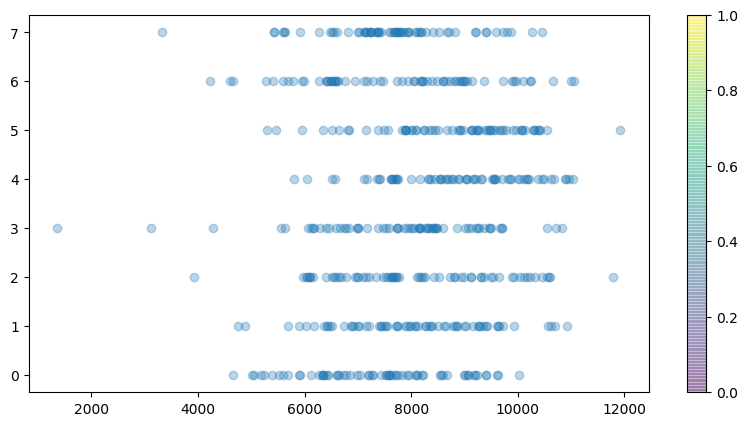

In [124]:
oned_eigenvec = eigenvectors[:,:1]
onedx_pca = oned_eigenvec.T.dot(xtrain.T)
plt.scatter(onedx_pca.T[:,:1],classes, alpha=0.3,cmap='red')
plt.colorbar();

# scatterplots to examine how the images are clustered in the 2D space using the number of principal components.

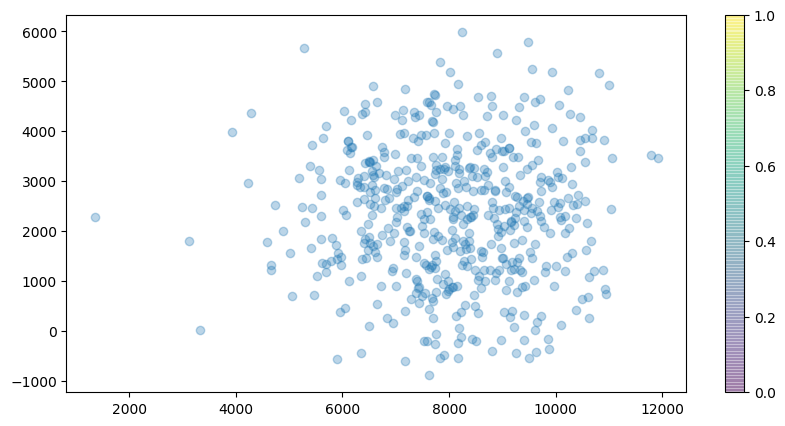

In [125]:
twod_eigenvec = eigenvectors[:,:2]
twodx_pca = twod_eigenvec.T.dot(xtrain.T)
plt.scatter(twodx_pca.T[:,:1],twodx_pca.T[:,1:2], alpha=0.3,cmap='red')
plt.colorbar();

# scatterplots to examine how the images are clustered in the 3D space using the number of principal components.

C:\Users\Indranil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Indranil\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
C:\Users\Indranil\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


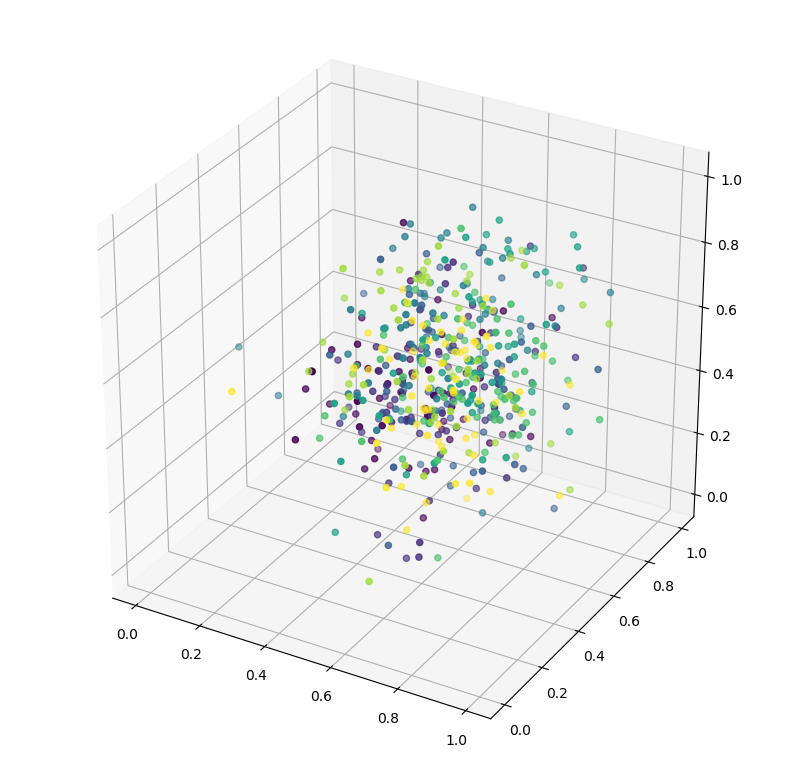

In [126]:
thd_eigenvec = eigenvectors[:,:3]
thdx_pca = thd_eigenvec.T.dot(xtrain.T)
x = np.array(thdx_pca.T[:,:1]).astype(float)
x = (x - np.min(x))/np.ptp(x)
y = np.array(thdx_pca.T[:,1:2]).astype(float)
y = (y - np.min(y))/np.ptp(y)
z = np.array(thdx_pca.T[:,2:3]).astype(float)
z = (z - np.min(z))/np.ptp(z)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z,c=classes,zdir='z',depthshade=True)